<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Lab: Exploratory Data Analysis**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis or EDA. 


## Objectives


In this lab, you will perform the following:


- Examine the structure of a dataset.

- Handle missing values effectively.

- Conduct summary statistics on key columns.

- Analyze employment status, job satisfaction, programming language usage, and trends in remote work.


## Hands on Lab


#### Step 1: Install and Import Libraries


Install the necessary libraries for data manipulation and visualization.


In [1]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 180.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 176.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 136.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 117.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 28.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 172.9 MB/s eta 0:00:00


#### Step 2: Load and Preview the Dataset
Load the dataset from the provided URL. Use df.head() to display the first few rows to get an overview of the structure.


In [2]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

#### Step 3: Handling Missing Data


Identify and manage missing values in critical columns such as `Employment`, `JobSat`, and `RemoteWork`. Implement a strategy to fill or drop these values, depending on the significance of the missing data.


In [3]:
## Write your code here
# Filling with most frequent value
cols = ['Employment', 'JobSat', 'RemoteWork'] 

for c in cols: 
    df[c] = df[c].fillna(df[c].mode()[0]) 
    print(c, df[c].isna().sum())

Employment 0
JobSat 0
RemoteWork 0


#### Step 4: Analysis of Experience and Job Satisfaction


Analyze the relationship between years of professional coding experience (`YearsCodePro`) and job satisfaction (`JobSat`). Summarize `YearsCodePro` and calculate median satisfaction scores based on experience ranges.

- Create experience ranges for `YearsCodePro` (e.g., `0-5`, `5-10`, `10-20`, `>20` years).

- Calculate the median `JobSat` for each range.

- Visualize the relationship using a bar plot or similar visualization.


In [4]:
df.YearsCodePro.unique()

array([nan, '17', '27', '7', '11', '25', '12', '10', '3',
       'Less than 1 year', '18', '37', '15', '20', '6', '2', '16', '8',
       '14', '4', '45', '1', '24', '29', '5', '30', '26', '9', '33', '13',
       '35', '23', '22', '31', '19', '21', '28', '34', '32', '40', '50',
       '39', '44', '42', '41', '36', '38', 'More than 50 years', '43',
       '47', '48', '46', '49'], dtype=object)

In [5]:
## Write your code here
## Replace YearsCodePro with ExperienceLevel 
df['YearsCodePro'] = df['YearsCodePro'].fillna(df['YearsCodePro'].mode()[0]) 

exp_dict = {'Less than 1 year' : '1', 'More than 50 years' : '50'}
           
df['ExperienceLevel'] = df['YearsCodePro'].replace(exp_dict)
df['ExperienceLevel'] = df['ExperienceLevel'].astype(int)

bins = [0, 1, 10, 20, 40, 49, 50]
labels = ['0-1', '1-10', '10-20', '20-40', '40-49', '50+']

df['YearsCoding_Ranges'] = pd.cut(df['ExperienceLevel'], bins=bins, labels=labels, right=False)
df

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat,ExperienceLevel,YearsCoding_Ranges
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,2,1-10
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,

In [6]:
df.JobSat.median()

np.float64(8.0)

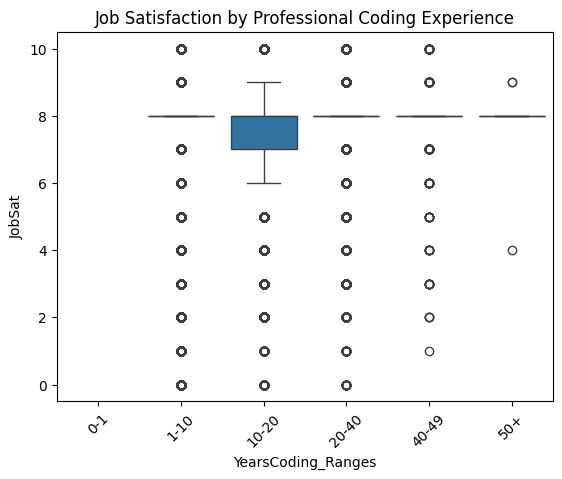

In [7]:
sns.boxplot(data=df, x='YearsCoding_Ranges', y='JobSat')
plt.xticks(rotation=45)
plt.title('Job Satisfaction by Professional Coding Experience')
plt.show()

#### Step 5: Visualize Job Satisfaction


Use a count plot to show the distribution of `JobSat` values. This provides insights into the overall satisfaction levels of respondents.


<Axes: xlabel='JobSat', ylabel='count'>

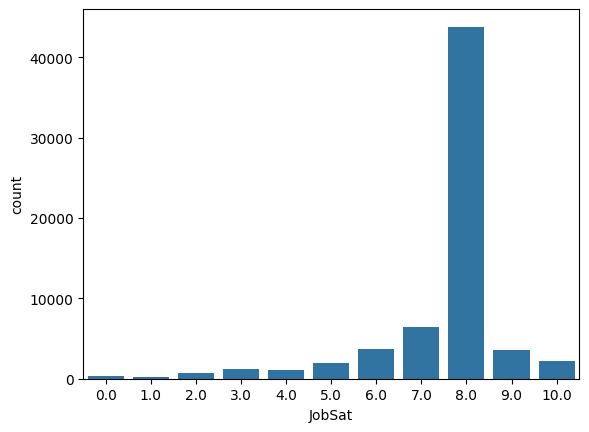

In [8]:
## Write your code here
sns.countplot(df, x="JobSat")

#### Step 6: Analyzing Remote Work Preferences by Job Role


Analyze trends in remote work based on job roles. Use the `RemoteWork` and `Employment` columns to explore preferences and examine if specific job roles prefer remote work more than others.

- Use a count plot to show remote work distribution.

- Cross-tabulate remote work preferences by employment type (e.g., full-time, part-time) and job roles.


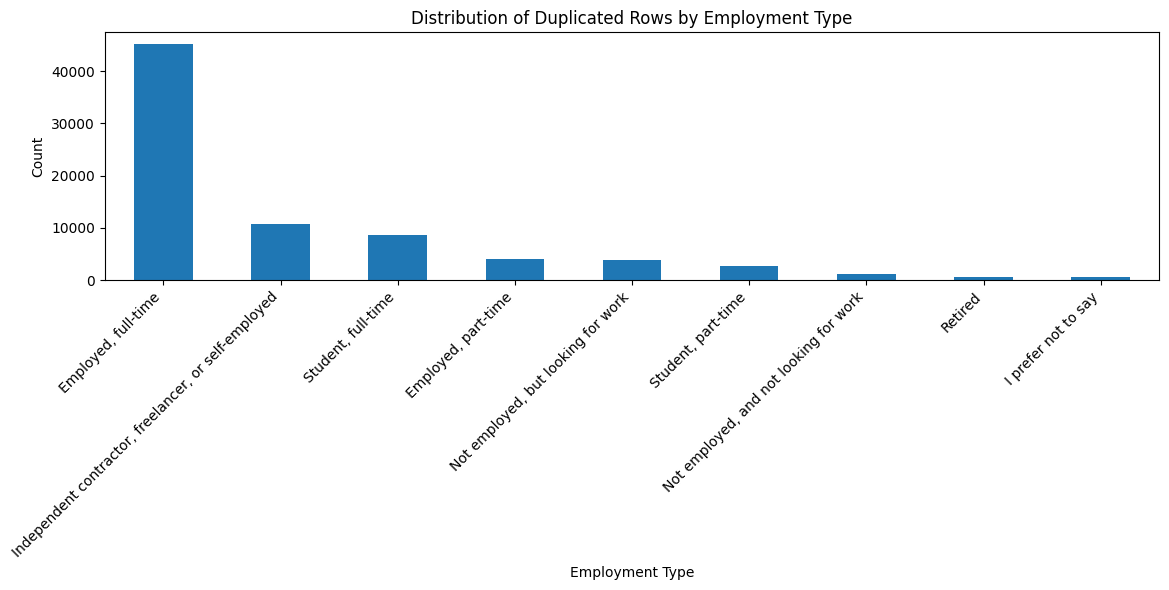

In [9]:
## Write your code here
df_exploded = df.assign(Employment=df['Employment'].str.split(';')).explode('Employment')

duplicate_counts_employment = df_exploded['Employment'].value_counts()

# Plot Employment duplicates
plt.figure(figsize=(12, 6))
duplicate_counts_employment.plot(kind='bar')
plt.title("Distribution of Duplicated Rows by Employment Type")
plt.xlabel("Employment Type")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Axes: xlabel='RemoteWork', ylabel='count'>

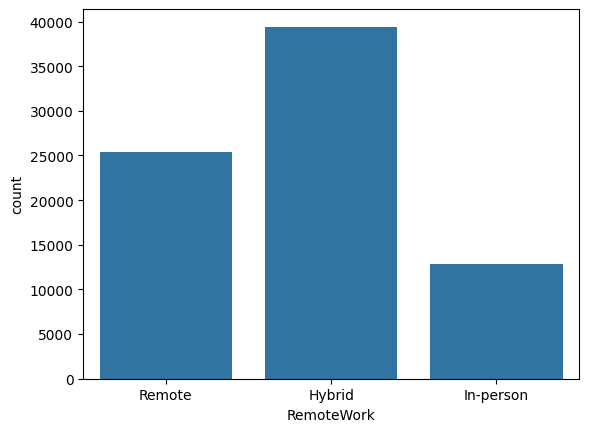

In [10]:
remote_dict = {'Hybrid (some remote, some in-person)' : 'Hybrid'}
df_exploded['RemoteWork'] = df_exploded['RemoteWork'].replace(remote_dict)

sns.countplot(df_exploded, x='RemoteWork')

In [11]:
pd.crosstab(df_exploded['Employment'], df_exploded['RemoteWork'])

RemoteWork,Hybrid,In-person,Remote
Employment,,,
"Employed, full-time",19706,9604,15852
"Employed, part-time",1922,1013,1210
I prefer not to say,546,0,0
"Independent contractor, freelancer, or self-employed",3492,901,6333
"Not employed, and not looking for work",1101,17,85
"Not employed, but looking for work",3449,73,432
Retired,599,21,61
"Student, full-time",7015,755,856
"Student, part-time",1591,496,569


#### Step 7: Analyzing Programming Language Trends by Region


Analyze the popularity of programming languages by region. Use the `LanguageHaveWorkedWith` column to investigate which languages are most used in different regions.

- Filter data by country or region.

- Visualize the top programming languages by region with a bar plot or heatmap.


In [12]:
## Write your code here
df.Country = df.Country.str.lower() 

country_dict = {'united states of america': 'usa', 
                'united kingdom of great britain and northern ireland' : 'uk', 
                'iran, islamic republic of...' : 'iran',
                'republic of north macedonia' : 'north macedonia',
                'russian federation' : 'russia', 
                'united republic of tanzania' : 'tanzania', 
                'venezuela, bolivarian republic of...' : 'venezuela',
                'republic of moldova' : 'moldova', 
                'united arab emirates' : 'uae', 
                'hong kong (s.a.r.)' : 'hong kong',   
                "lao people's democratic republic" : 'laos', 
                'democratic republic of the congo' : 'dr congo',
                'syrian arab republic': 'syria', 
                "côte d'ivoire" : 'cdi', 
                "democratic people's republic of korea" : 'north korea',
                'congo, republic of the...' : 'congo',  
                'libyan arab jamahiriya' : 'libya', 
                'brunei darussalam' : 'brunei',  
                'micronesia, federated states of...' : 'micronesia'}  
                

df.loc[df.Country == 'viet nam', 'Country'] = 'vietnam'
df['Country'] = df['Country'].replace(country_dict)
df.Country.unique()

array(['usa', 'uk', 'canada', 'norway', 'uzbekistan', 'serbia', 'poland',
       'philippines', 'bulgaria', 'switzerland', 'india', 'germany',
       'ireland', 'italy', 'ukraine', 'australia', 'brazil', 'japan',
       'austria', 'iran', 'france', 'saudi arabia', 'romania', 'turkey',
       'nepal', 'algeria', 'sweden', 'netherlands', 'croatia', 'pakistan',
       'czech republic', 'north macedonia', 'finland', 'slovakia',
       'russia', 'greece', 'israel', 'belgium', 'mexico', 'tanzania',
       'hungary', 'argentina', 'portugal', 'sri lanka', 'latvia', 'china',
       'singapore', 'lebanon', 'spain', 'south africa', 'lithuania',
       'vietnam', 'dominican republic', 'indonesia', 'kosovo', 'morocco',
       'taiwan', 'georgia', 'san marino', 'tunisia', 'bangladesh',
       'nigeria', 'liechtenstein', 'denmark', 'ecuador', 'malaysia',
       'albania', 'azerbaijan', 'chile', 'ghana', 'peru', 'bolivia',
       'egypt', 'luxembourg', 'montenegro', 'cyprus', 'paraguay',
       'kazak

In [20]:
nalist = ['usa', 'canada', 'mexico']
salist = ['brazil', 'argentina', 'dominican republic', 'peru', 'bolivia', 'paraguay', 'venezuela', 'costa rica', 'el salvador',
          'colombia', 'cuba', 'bahamas', 'panama', 'saint kitts and nevis']
eulist = ['uk', 'norway', 'serbia', 'poland', 'bulgaria', 'switzerland', 'germany', 'ireland', 'italy', 'ukraine', 'austria',
          'france', 'romania', 'turkey', 'sweden', 'netherlands', 'croatia', 'czech republic', 'north macedonia', 'finland', 'slovakia',
       'russia', 'greece', 'israel', 'belgium','hungary', 'portugal', 'latvia', 'spain', 'lithuania', 'kosovo', 
          'georgia', 'san marino', 'liechtenstein', 'denmark', 'albania','luxembourg', 'montenegro', 'cyprus', 'slovenia', 'bosnia and herzegovina',
         'estonia', 'malta', 'belarus', 'moldova', 'isle of man', 'armenia', 'monaco']

In [21]:
df_na = df[(df['Country'] == 'usa') | (df['Country'] == 'canada') | (df['Country'] == 'mexico')]

#df_na['LanguageHaveWorkedWith'] = df_na['LanguageHaveWorkedWith'].fillna(df_usa['LanguageHaveWorkedWith'].mode()[0])
df_na['LanguageHaveWorkedWith'] = df_na['LanguageHaveWorkedWith'].dropna()



/tmp/ipykernel_301/1294370168.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_na['LanguageHaveWorkedWith'] = df_na['LanguageHaveWorkedWith'].dropna()


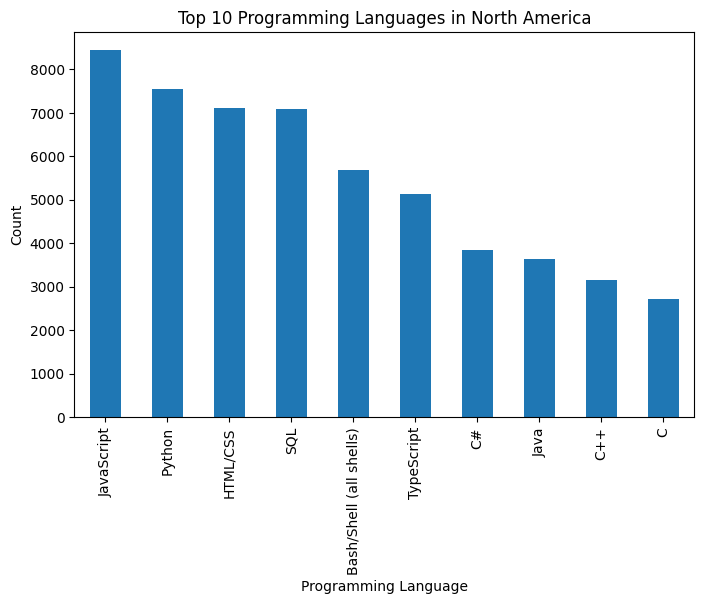

In [22]:
# Split the 'LanguageHaveWorkedWith' column and count frequencies
from collections import Counter

languages = df_na['LanguageHaveWorkedWith'].dropna().str.split(';').sum()
lang_counts = pd.Series(Counter(languages)).sort_values(ascending=False).head(10)

# Visualize top 10 programming languages in the USA
plt.figure(figsize=(8,5))
lang_counts.plot(kind='bar')
plt.title('Top 10 Programming Languages in North America')
plt.xlabel('Programming Language')
plt.ylabel('Count')
plt.show()

#### Step 8: Correlation Between Experience and Satisfaction


Examine how years of experience (`YearsCodePro`) correlate with job satisfaction (`JobSatPoints_1`). Use a scatter plot to visualize this relationship.


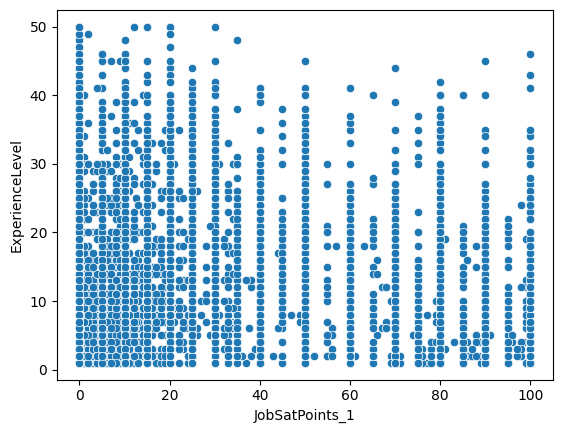

In [29]:
## Write your code here
sns.scatterplot(y="ExperienceLevel", x="JobSatPoints_1", data=df)
plt.show()

#### Step 9: Educational Background and Employment Type


Explore how educational background (`EdLevel`) relates to employment type (`Employment`). Use cross-tabulation and visualizations to understand if higher education correlates with specific employment types.


In [30]:
## Write your code here
pd.crosstab(df_exploded['Employment'], df_exploded['EdLevel'])

EdLevel,"Associate degree (A.A., A.S., etc.)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Primary/elementary school,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)","Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",Some college/university study without earning a degree,Something else
Employment,,,,,,,,
"Employed, full-time",1260,19136,12489,201,2312,1860,4494,448
"Employed, part-time",137,1344,753,79,149,623,669,69
I prefer not to say,9,96,53,51,29,92,51,83
"Independent contractor, freelancer, or self-employed",323,3711,2679,159,485,902,1634,145
"Not employed, and not looking for work",22,226,110,155,23,338,174,45
"Not employed, but looking for work",127,1501,555,114,86,528,618,84
Retired,23,199,149,12,112,24,107,19
"Student, full-time",189,2034,584,583,87,2712,1484,166
"Student, part-time",98,817,345,90,46,427,522,66


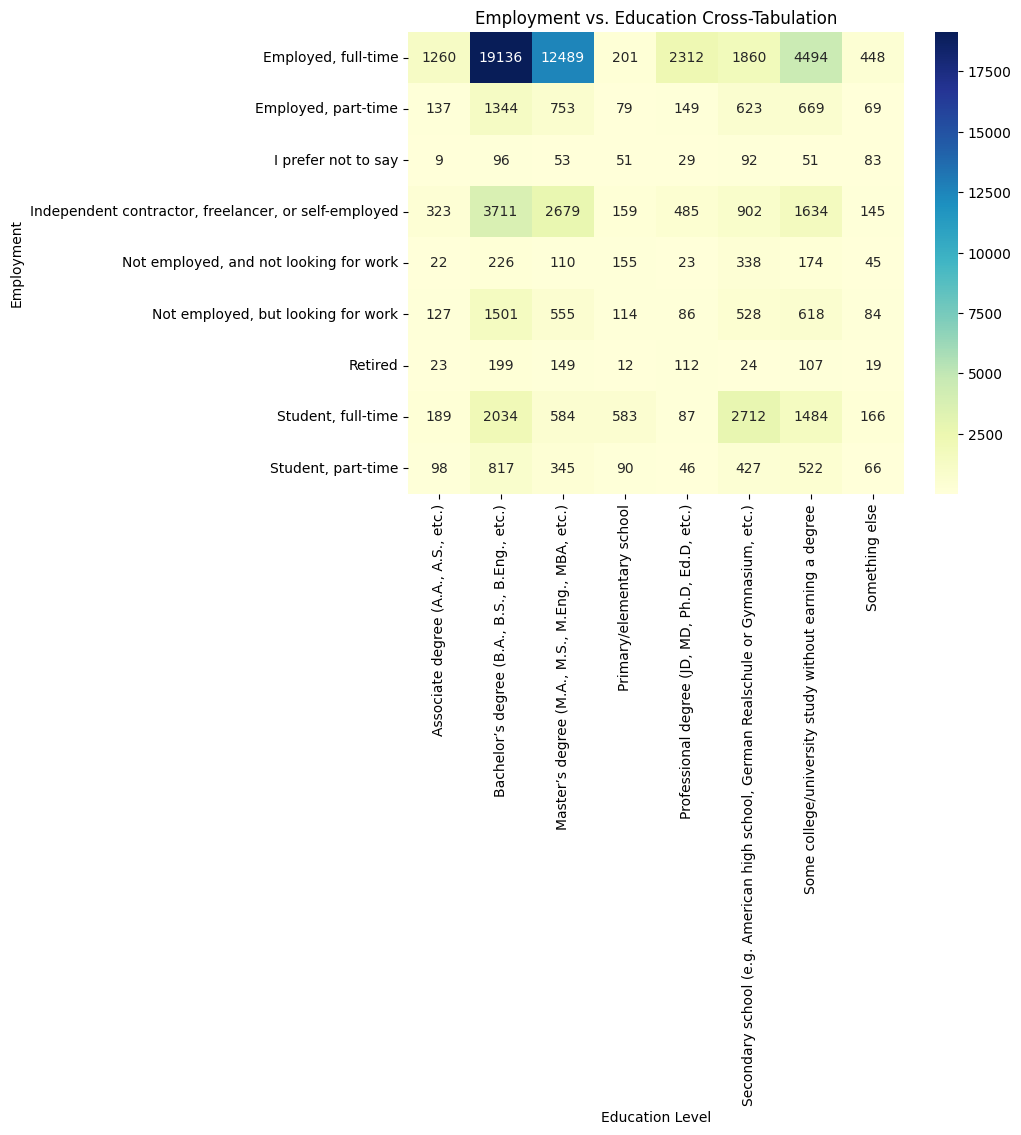

In [31]:
plt.figure(figsize=(8, 6))
sns.heatmap(pd.crosstab(df_exploded['Employment'], df_exploded['EdLevel']), annot=True, fmt='d', cmap='YlGnBu')
plt.title('Employment vs. Education Cross-Tabulation')
plt.xlabel('Education Level')
plt.ylabel('Employment')
plt.show()

#### Step 10: Save the Cleaned and Analyzed Dataset


After your analysis, save the modified dataset for further use or sharing.


In [ ]:
## Write your code here
df_exploded.to_csv('cleaned_database.csv')

<h2>Summary</h2>


In this revised lab, you:

- Loaded and explored the structure of the dataset.

- Handled missing data effectively.

- Analyzed key variables, including working hours, job satisfaction, and remote work trends.

- Investigated programming language usage by region and examined the relationship between experience and satisfaction.

- Used cross-tabulation to understand educational background and employment type.


Copyright © IBM Corporation. All rights reserved.
